In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats
import pickle
import copy
import random 
np.set_printoptions(suppress=True)
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import r2_score

In [ ]:
# path to data
PATH = 'D:/iat/pickle_col/'

In [3]:
# Load data chunks

CompleteFrame = pd.DataFrame()
for stimulus in [True, False]:
    Frame = pd.DataFrame()
    datasets = os.listdir(PATH+str(stimulus)+"/")
    for dataset in datasets:
        pickles = pickle.load(open(PATH +str(stimulus)+"/" +str(dataset), "rb" ))
        raw_data = pickles['data_array']    
        df_oneset = np.concatenate((pickles['est_array'],pickles['outcome_array']), axis=1)  
        Frame = Frame.append(pd.DataFrame(data = df_oneset), ignore_index=True)
        Frame ['stimulus'] = stimulus
        
    CompleteFrame = CompleteFrame.append(Frame, ignore_index=True)
    
CompleteFrame.shape

(1185492, 19)

In [4]:
CompleteFrame

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,stimulus
0,1.354280,2.297936,2.373641,2.567171,0.277097,1.542428,0.302739,1.142765,1.355595,2.287091,2.307771,2.510691,0.233593,1.559839,0.305093,1.138314,2.624220e+09,21.0,True
1,1.690433,2.370883,1.549097,1.468697,0.492487,1.446743,0.428285,0.977782,1.684824,2.364053,1.457052,1.390903,0.497442,1.418570,0.430923,0.981186,2.624221e+09,51.0,True
2,1.154948,2.148033,1.814179,1.564309,0.775293,0.697115,0.338857,0.710036,1.151407,2.134472,1.621300,1.404789,0.816387,0.425112,0.342716,0.712812,2.624221e+09,21.0,True
3,1.187725,2.100597,2.230171,1.901654,0.398909,1.464361,0.237163,2.119045,1.190821,2.094445,2.136543,1.835803,0.384898,1.440643,0.240643,2.123554,2.624221e+09,21.0,True
4,1.350845,1.294342,2.707176,1.722996,0.267489,1.544774,0.405380,1.210594,1.353021,1.284369,2.665935,1.696599,0.220150,1.567509,0.407413,1.211736,2.624221e+09,23.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185487,1.433991,1.804810,1.900696,1.811205,0.172107,1.537676,0.332012,0.839977,1.432953,1.794850,1.862825,1.773411,0.124164,1.528931,0.334148,0.843471,2.636130e+09,17.0,False
1185488,2.289704,2.541710,2.342874,1.508361,0.726108,0.863499,0.370554,0.435022,2.288194,2.540750,2.171838,1.379403,0.780925,0.614252,0.374326,0.439174,2.636130e+09,19.0,False
1185489,0.938754,1.445590,1.549677,1.624632,0.533109,1.389678,0.281653,0.473429,0.931909,1.441252,1.441818,1.523847,0.555442,1.318561,0.285214,0.478761,2.636130e+09,18.0,False
1185490,1.702733,2.228976,2.351364,2.716479,0.255160,1.523444,0.335955,1.277788,1.708174,2.215948,2.287944,2.672145,0.209055,1.540713,0.338106,1.282687,2.636130e+09,25.0,False


In [5]:
# give variables interpretable names
df = CompleteFrame.rename(columns={0: "v1", 1: "v2", 2: "a1", 3: "a2", 4: "kappa",
                           5: "tsat",6: "tplus", 7: "tminus", 16: "session_id", 17:"agex"})

In [7]:
df = df[df['agex']<81] # use only up to age 80
df.shape

(1184918, 19)

In [8]:
#save csv
df.to_csv("d:/iat/final_iat_col.csv", index=False) # write df as csv

In [4]:
# read csv if needed
df = pd.read_csv("d:/iat/final_iat_col.csv")

In [5]:
print(df.shape)

(1184918, 19)


In [6]:
df.head()

,v1,v2,a1,a2,kappa,tsat,tplus,tminus,8,9,10,11,12,13,14,15,session_id,agex,stimulus
0,1.354280,2.297936,2.373641,2.567171,0.277097,1.542428,0.302739,1.142765,1.355595,2.287091,2.307771,2.510691,0.233593,1.559839,0.305093,1.138314,2.624220e+09,21.0,True
1,1.690433,2.370883,1.549097,1.468697,0.492487,1.446743,0.428285,0.977782,1.684824,2.364053,1.457052,1.390903,0.497442,1.418570,0.430923,0.981186,2.624221e+09,51.0,True
2,1.154948,2.148033,1.814179,1.564309,0.775293,0.697115,0.338857,0.710036,1.151407,2.134472,1.621300,1.404789,0.816387,0.425112,0.342716,0.712812,2.624221e+09,21.0,True
3,1.187725,2.100597,2.230171,1.901654,0.398909,1.464361,0.237163,2.119045,1.190821,2.094445,2.136543,1.835803,0.384898,1.440643,0.240643,2.123554,2.624221e+09,21.0,True
4,1.350845,1.294342,2.707176,1.722996,0.267489,1.544774,0.405380,1.210594,1.353021,1.284369,2.665935,1.696599,0.220150,1.567509,0.407413,1.211736,2.624221e+09,23.0,True


In [7]:
df.describe()

,v1,v2,a1,a2,kappa,tsat,tplus,tminus,8,9,10,11,12,13,14,15,session_id,agex
count,1.184918e+06,1.184918e+06,1.184918e+06,1.184918e+06,1.184918e+06,1.184918e+06,1.184918e+06,1.184918e+06,1.184918e+06,1.184918e+06,1.184918e+06,1.184918e+06,1.184918e+06,1.184918e+06,1.184918e+06,1.184918e+06,1.184918e+06,1.184918e+06
mean,1.532131e+00,1.962713e+00,2.280033e+00,2.087863e+00,3.686864e-01,1.448526e+00,3.612727e-01,1.221668e+00,1.531333e+00,1.956031e+00,2.218146e+00,2.032795e+00,3.502984e-01,1.420402e+00,3.637260e-01,1.225108e+00,2.630785e+09,2.741738e+01
std,6.078795e-01,7.757880e-01,5.080028e-01,5.199361e-01,1.908802e-01,2.166368e-01,7.430839e-02,8.805609e-01,6.072393e-01,7.752532e-01,5.289457e-01,5.343380e-01,2.195100e-01,2.972382e-01,7.439243e-02,8.808772e-01,3.914133e+06,1.232902e+01
min,1.000181e-01,1.001382e-01,3.035267e-01,4.836935e-01,1.019485e-02,2.831436e-01,1.000252e-01,1.000077e-01,9.506884e-02,9.241362e-02,3.029390e-01,4.788985e-01,-4.767940e-03,1.968649e-01,6.315582e-02,9.729667e-02,2.624220e+09,1.000000e+01
25%,1.125027e+00,1.443177e+00,1.910247e+00,1.706207e+00,2.137326e-01,1.418822e+00,3.146213e-01,7.138382e-01,1.124805e+00,1.437879e+00,1.832823e+00,1.642373e+00,1.680300e-01,1.368221e+00,3.170768e-01,7.170678e-01,2.627286e+09,1.900000e+01
50%,1.451144e+00,1.842602e+00,2.224771e+00,2.016252e+00,3.355455e-01,1.508835e+00,3.592489e-01,9.422372e-01,1.450810e+00,1.835821e+00,2.150550e+00,1.951642e+00,2.938009e-01,1.505353e+00,3.617943e-01,9.456585e-01,2.630783e+09,2.200000e+01
75%,1.847822e+00,2.348302e+00,2.599701e+00,2.401448e+00,5.003800e-01,1.563433e+00,4.047115e-01,1.372724e+00,1.846808e+00,2.339962e+00,2.542742e+00,2.343891e+00,5.015832e-01,1.590399e+00,4.072312e-01,1.376204e+00,2.634094e+09,3.300000e+01
max,6.768448e+00,6.699236e+00,3.999705e+00,3.999144e+00,9.639725e-01,2.340253e+00,2.899354e+00,6.999936e+00,6.829650e+00,6.757662e+00,4.010957e+00,4.013924e+00,9.851397e-01,2.477031e+00,2.901166e+00,7.012764e+00,2.637618e+09,8.000000e+01


# Plots parameters vs age

In [8]:
# Format data
df_grouped = df.groupby(['agex']).agg(['mean','sem'])
df_grouped = df_grouped.iloc[:, [0,1,2,3,4,5,6,7,12,13,14,15]]
df_grouped.columns =df_grouped.columns.to_flat_index().map(lambda x: '_'.join(x))
df_grouped.reset_index(level=['agex'], inplace=True)

In [9]:
df_grouped

,agex,v1_mean,v1_sem,v2_mean,v2_sem,a1_mean,a1_sem,a2_mean,a2_sem,tplus_mean,tplus_sem,tminus_mean,tminus_sem
0,10.0,1.129092,0.034132,1.416238,0.035001,2.458440,0.031623,2.252521,0.033174,0.371215,0.005569,1.156952,0.048093
1,11.0,1.133937,0.022480,1.363501,0.023344,2.459255,0.020614,2.235050,0.020310,0.357946,0.003647,1.082280,0.028695
2,12.0,1.118660,0.011152,1.363810,0.012732,2.383386,0.011412,2.174117,0.011028,0.343623,0.001891,1.063833,0.017318
3,13.0,1.191265,0.006916,1.452871,0.008056,2.314693,0.006483,2.106266,0.006367,0.338472,0.001057,1.017590,0.009318
4,14.0,1.261771,0.004494,1.539258,0.005268,2.272535,0.003909,2.050206,0.003910,0.335641,0.000604,1.008952,0.005859
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,76.0,1.201412,0.027373,1.811340,0.035056,2.870502,0.030113,2.390562,0.026615,0.472362,0.004963,1.938204,0.054267
67,77.0,1.105632,0.026918,1.813076,0.044121,2.883164,0.031525,2.492389,0.030359,0.471367,0.005882,2.049231,0.071609
68,78.0,1.157933,0.032197,1.805240,0.045669,2.899758,0.038919,2.382409,0.035005,0.474560,0.007125,1.992730,0.075551
69,79.0,1.089690,0.035630,1.704082,0.047223,2.932052,0.042142,2.485066,0.039407,0.488381,0.007933,2.152271,0.093366


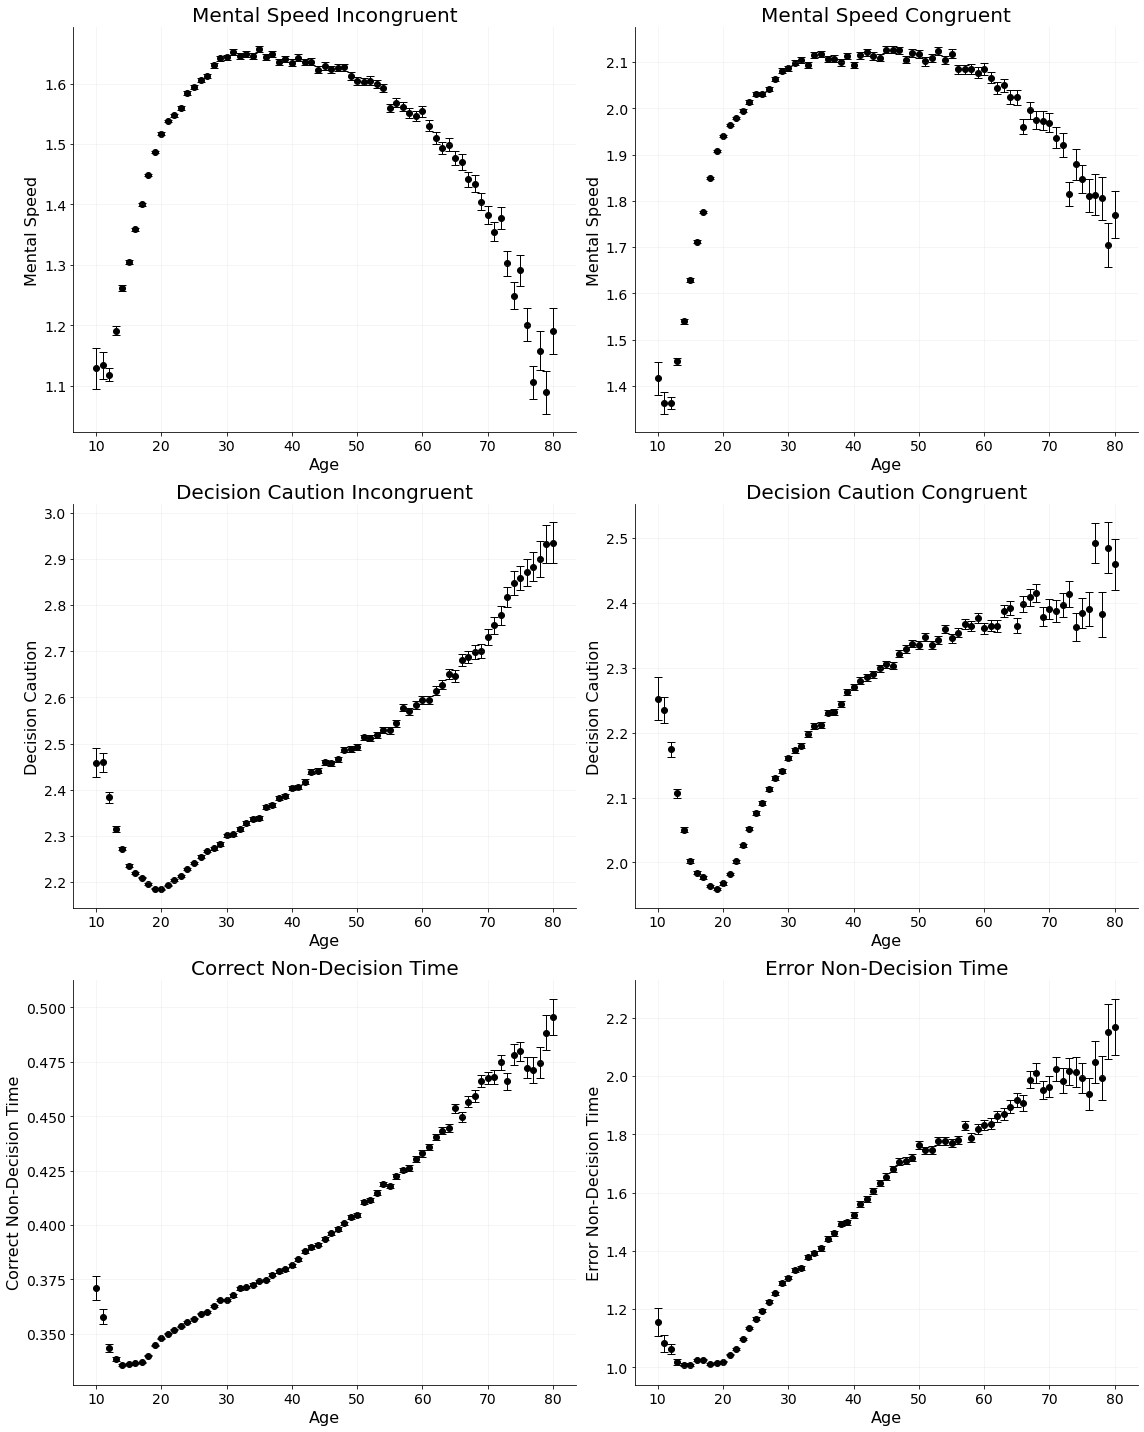

In [12]:
# Plot parameters vs. age

f, axarr = plt.subplots(3, 2, figsize=(16, 20))


titles = ['Mental Speed Incongruent', 'Mental Speed Congruent', 
          'Decision Caution Incongruent','Decision Caution Congruent',
         'Correct Non-Decision Time', 'Error Non-Decision Time']
ylabels = ['Mental Speed', 'Mental Speed', 
          'Decision Caution','Decision Caution',
         'Correct Non-Decision Time', 'Error Non-Decision Time']

# Plot Mental Speed Incongruent

axarr[0, 0].scatter(df_grouped['agex'], df_grouped['v1_mean'], color='black',)
axarr[0, 0].errorbar(df_grouped['agex'], df_grouped['v1_mean'], df_grouped['v1_sem'], capsize=4, fmt='none',
                    color='black',  linewidth=1)

# Plot Mental Speed Congruent

axarr[0, 1].scatter(df_grouped['agex'], df_grouped['v2_mean'], color='black', )
axarr[0, 1].errorbar(df_grouped['agex'], df_grouped['v2_mean'], df_grouped['v2_sem'], capsize=4, fmt='none',
                    color='black',  linewidth=1)

# Plot Decision Caution Incongruent 

axarr[1, 0].scatter(df_grouped['agex'], df_grouped['a1_mean'], color='black', )
axarr[1, 0].errorbar(df_grouped['agex'], df_grouped['a1_mean'], df_grouped['a1_sem'], capsize=4, fmt='none',
                    color='black', linewidth=1)

# Plot Decision Caution Congruent 

axarr[1, 1].scatter(df_grouped['agex'], df_grouped['a2_mean'], color='black', )
axarr[1, 1].errorbar(df_grouped['agex'], df_grouped['a2_mean'], df_grouped['a2_sem'], capsize=4, fmt='none',
                    color='black',  linewidth=1)

# Plot Correct NDT

axarr[2, 0].scatter(df_grouped['agex'], df_grouped['tplus_mean'], color='black', )
axarr[2, 0].errorbar(df_grouped['agex'], df_grouped['tplus_mean'], df_grouped['tplus_sem'], capsize=4, fmt='none',
                    color='black',  linewidth=1)

# Plot Error NDT

axarr[2, 1].scatter(df_grouped['agex'], df_grouped['tminus_mean'], color='black',)
axarr[2, 1].errorbar(df_grouped['agex'], df_grouped['tminus_mean'], df_grouped['tminus_sem'], capsize=4, fmt='none',
                    color='black',  linewidth=1)

for i, ax in enumerate(axarr.flat):
    sns.despine(ax=ax)
    ax.set_title(titles[i], fontsize=20)
    ax.set_ylabel(ylabels[i], fontsize=16)
    ax.set_xlabel('Age', fontsize=16)
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)
    ax.grid(alpha=0.15)
    
f.tight_layout()
f.savefig('Collapsing Boundaries.png', dpi=300)